In [2]:
# import tensorflow as tf
# import tensorflow.keras as kr
import nibabel as nib
import numpy as np
import os
from glob import glob
import matplotlib.pylab as plt
import pydicom as dicom
import multiprocessing as mp




155


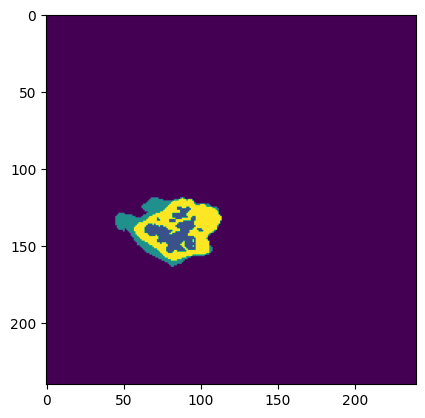

In [28]:
image = nib.load(r"/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00000/BraTS2021_00000_flair.nii.gz").get_fdata()
imag = image[:, :, image.shape[2] // 2]  
plt.imshow(image[:,:,77])
print(image.shape[2])

In [4]:
folder_path = [os.path.join(r"/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data", i) for i in os.listdir(r"/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data")]
imgs = []

for i in folder_path:
    imgs.append(glob(i+"/*"))
print("Done")
folder_path = folder_path[1:]
imgs = imgs[1:]
print(imgs[0])


Done
['/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00000/BraTS2021_00000_flair.nii.gz', '/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00000/BraTS2021_00000_seg.nii.gz', '/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00000/BraTS2021_00000_t1.nii.gz', '/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00000/BraTS2021_00000_t1ce.nii.gz', '/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00000/BraTS2021_00000_t2.nii.gz', '/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00000/test.py']


In [5]:
outputpath = []
inputpath = []
for j in imgs:
    for i in j:
        if "seg.nii.gz" in i.split("_"):
            outputpath.append(i)
for j in imgs:
    temppath = []
    for i in j:
        if "seg.nii.gz" not in i.split("_"):
            temppath.append(i)
    inputpath.append(temppath)

In [54]:
import os, psutil
process = psutil.Process(os.getpid())

index = 0
outputimg = np.array((nib.load(outputpath[0]).get_fdata().astype(np.float32)[:, :, 75]))
for i in range(1,len(outputpath)):
    index+=1
    print(index)
    print(outputpath[i])
    outputimg = np.dstack((outputimg,nib.load(outputpath[i]).get_fdata().astype(np.float32)[:, :, 75]),)
outputimg = outputimg.transpose((2, 0, 1))

1
/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00002/BraTS2021_00002_seg.nii.gz
2
/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00003/BraTS2021_00003_seg.nii.gz
3
/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00005/BraTS2021_00005_seg.nii.gz
4
/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00006/BraTS2021_00006_seg.nii.gz
5
/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00008/BraTS2021_00008_seg.nii.gz
6
/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00009/BraTS2021_00009_seg.nii.gz
7
/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00011/BraTS2021_00011_seg.nii.gz
8
/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00012/BraTS2021_00012_seg.nii.gz
9
/mnt/d/Fabio/deeplearningdata/archive_1/BraTS2021_Training_Data/BraTS2021_00014/BraTS2021_00014_seg.nii.gz
10
/mnt/d/Fabio/dee

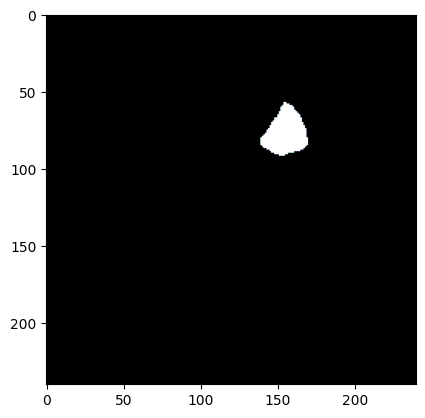

In [60]:
plt.imshow(outputimg[5],cmap="bone")